In [1]:
# # # # mount drive, only need to be done once
# from google.colab import drive
# drive.mount('/content/gdrive')

In [2]:
# %cd /content/gdrive/MyDrive/colab/quantumpressureAdS/

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### BH geometry

In [4]:
def rAdS(m, l):
    # returns horizon position wrt Schw
    L = 2*(l**3)*m
    M = 2*(l**2)*m
    r_schw = 2*m
    
    t1 = np.sqrt(12*(L**6) + 81*(M**6)) + 9*(M**3)
    T1 = (t1**(1/3))/((2**(1/3))*(3**(2/3)))
    T2 = -((2/3)**(1/3))*(L**2)/(t1**(1/3))
    return (T1 + T2)/r_schw

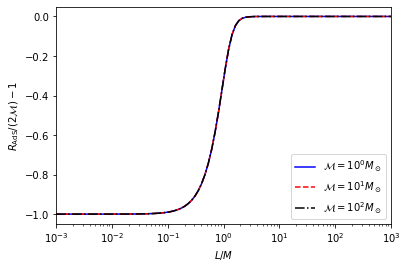

In [5]:
l_space = np.logspace(-3, 3, 100) # range = (1e-2, 1e4)
plt.plot(l_space, rAdS(1e0, l_space) - 1, 'b-', label = r'${\cal M} = 10^0 M_\odot$')
plt.plot(l_space, rAdS(1e1, l_space) - 1, 'r--', label = r'${\cal M} = 10^1 M_\odot$')
plt.plot(l_space, rAdS(1e5, l_space) - 1, 'k-.', label = r'${\cal M} = 10^2 M_\odot$')

plt.xscale('log')
plt.xlim(min(l_space), max(l_space))
plt.xlabel('$L/M$')
plt.ylabel(r'$R_{\rm AdS}/(2 {\cal M}) - 1$')
plt.legend(loc = 'lower right')
# plt.savefig('figs/horizonvsl.pdf', bbox_inches = 'tight')
plt.show()

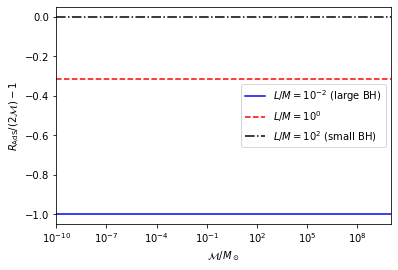

In [6]:
m_space = np.logspace(-10, 10, 100) # range = (1e-2, 1e4)
plt.plot(m_space, rAdS(m_space, 1e-2) - 1, 'b-', label = r'$L/M = 10^{-2}$ (large BH)')
plt.plot(m_space, rAdS(m_space, 1e0) - 1, 'r--', label = r'$L/M = 10^0$')
plt.plot(m_space, rAdS(m_space, 1e2) - 1, 'k-.', label = r'$L/M = 10^2$ (small BH)')

plt.xscale('log')
plt.xlim(min(m_space), max(m_space))
plt.xlabel(r'${\cal M}/M_\odot$')
plt.ylabel(r'$R_{\rm AdS}/(2 {\cal M}) - 1$')
plt.legend(loc = 'center right')
# plt.savefig('figs/horizonvsm.pdf', bbox_inches = 'tight')
plt.show()

In [7]:
def drAdS(m, l):
    L = 2*(l**3)*m
    M = 2*(l**2)*m
    R_AdS = rAdS(m, l) # reference
    
    num = 5*(L**6) + 27*(L**4)*(R_AdS**2) \
    + 39*(L**2)*(R_AdS**4) + 21*(R_AdS**6)
    den = (L**2)*(R_AdS**3) + 3*(R_AdS**5)
    return -num/(den*L)

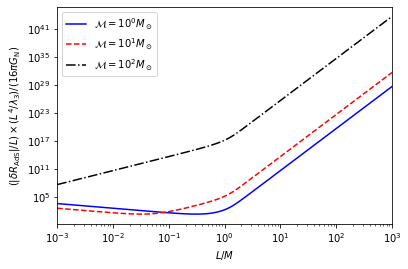

In [8]:
l_space = np.logspace(-3, 3, 100) # range = (1e-2, 1e4)
plt.plot(l_space, -drAdS(1e0, l_space), \
         'b-', label = r'${\cal M} = 10^0 M_\odot$')
plt.plot(l_space, -drAdS(1e1, l_space), \
         'r--', label = r'${\cal M} = 10^1 M_\odot$')
plt.plot(l_space, -drAdS(1e5, l_space), \
         'k-.', label = r'${\cal M} = 10^2 M_\odot$')

plt.xscale('log')
plt.yscale('log')
plt.xlim(min(l_space), max(l_space))
plt.xlabel('$L/M$')
plt.ylabel(r'$(|\delta R_{\rm AdS}|/L)\times(L^4/\lambda_3)/(16\pi G_{\rm N})$')
plt.legend(loc = 'upper left')
# plt.savefig('figs/horizonshiftvsl.pdf', bbox_inches = 'tight')
plt.show()

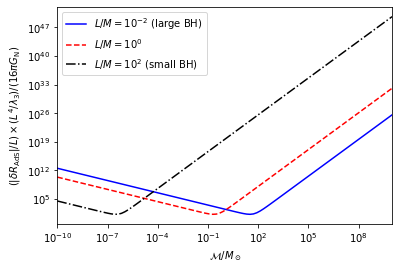

In [9]:
m_space = np.logspace(-10, 10, 100) # range = (1e-2, 1e4)
plt.plot(m_space, -drAdS(m_space, 1e-2), 'b-', label = r'$L/M = 10^{-2}$ (large BH)')
plt.plot(m_space, -drAdS(m_space, 1e0), 'r--', label = r'$L/M = 10^0$')
plt.plot(m_space, -drAdS(m_space, 1e2), 'k-.', label = r'$L/M = 10^2$ (small BH)')

plt.xscale('log')
plt.yscale('log')
plt.xlim(min(m_space), max(m_space))
plt.xlabel(r'${\cal M}/M_\odot$')
plt.ylabel(r'$(|\delta R_{\rm AdS}|/L)\times(L^4/\lambda_3)/(16\pi G_{\rm N})$')
plt.legend(loc = 'upper left')
# plt.savefig('figs/horizonshiftvsm.pdf', bbox_inches = 'tight')
plt.show()

### temperature (spherical horizon only)

In [10]:
def T_AdS(m, l, d, k):
    # k = 0 (flat)/k = 1 (spherical)
    L = 2*(l**3)*m
    M = 2*(l**2)*m
    R_AdS = rAdS(m, l) # reference
    
    bare = R_AdS/(4*np.pi*(L**2))
    d_fact = (d + 1) + k*(L**2)*(d - 1)/(R_AdS**2)
    return bare*d_fact*(4*np.pi*L)

def dT_AdS(m, l, d, k):
    # k = 0 (flat)/k = 1 (spherical)
    L = 2*(l**3)*m
    M = 2*(l**2)*m
    R_AdS = rAdS(m, l) # reference
    dR_AdS = drAdS(m, l) # reference
    
    bare = dR_AdS/(4*np.pi*(L**2))
    d_fact = (d + 1) - k*(L**2)*(d - 1)/(R_AdS**2)
    return bare*d_fact

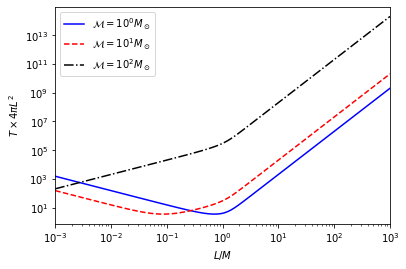

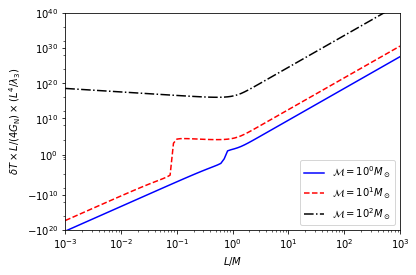

In [11]:
l_space = np.logspace(-3, 3, 100) # range = (1e-2, 1e4)
plt.plot(l_space, T_AdS(1e0, l_space, d = 2, k = 1), 'b-', label = r'${\cal M} = 10^0 M_\odot$')
plt.plot(l_space, T_AdS(1e1, l_space, d = 2, k = 1), 'r--', label = r'${\cal M} = 10^1 M_\odot$')
plt.plot(l_space, T_AdS(1e5, l_space, d = 2, k = 1), 'k-.', label = r'${\cal M} = 10^2 M_\odot$')

plt.xscale('log')
plt.yscale('log')
plt.xlim(min(l_space), max(l_space))
plt.xlabel('$L/M$')
plt.ylabel(r'$T\times 4\pi L^2$')
plt.legend(loc = 'upper left')
# plt.savefig('figs/tempvsl.pdf', bbox_inches = 'tight')
plt.show()

# perturbation
fig, ax = plt.subplots()
ax.plot(l_space, dT_AdS(1e0, l_space, d = 2, k = 1), 'b-', label = r'${\cal M} = 10^0 M_\odot$')
ax.plot(l_space, dT_AdS(1e1, l_space, d = 2, k = 1), 'r--', label = r'${\cal M} = 10^1 M_\odot$')
ax.plot(l_space, dT_AdS(1e5, l_space, d = 2, k = 1), 'k-.', label = r'${\cal M} = 10^2 M_\odot$')

ax.set_xscale('log')
ax.set_yscale('symlog')
ax.set_yticks([-1e40, -1e30, -1e20, -1e10, \
               1e0, 1e10, 1e20, 1e30, 1e40])
ax.set_xlim(min(l_space), max(l_space))
ax.set_ylim(-1e20, 1e40)
ax.set_xlabel('$L/M$')
ax.set_ylabel(r'$\delta T \times L/(4G_{\rm N}) \times (L^4/\lambda_3)$')
ax.legend(loc = 'lower right')
# fig.savefig('figs/dTvsl.pdf', bbox_inches = 'tight')
plt.show()

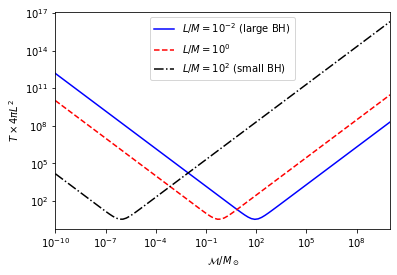

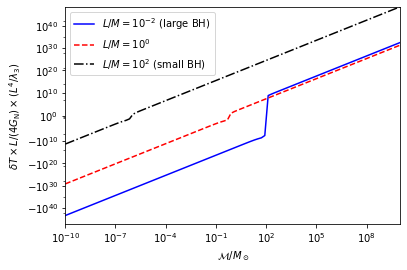

In [12]:
m_space = np.logspace(-10, 10, 100) # range = (1e-2, 1e4)
plt.plot(m_space, T_AdS(m_space, 1e-2, d = 2, k = 1), 'b-', label = r'$L/M = 10^{-2}$ (large BH)')
plt.plot(m_space, T_AdS(m_space, 1e0, d = 2, k = 1), 'r--', label = r'$L/M = 10^0$')
plt.plot(m_space, T_AdS(m_space, 1e2, d = 2, k = 1), 'k-.', label = r'$L/M = 10^2$ (small BH)')

plt.xscale('log')
plt.yscale('log')
plt.xlim(min(m_space), max(m_space))
plt.xlabel(r'${\cal M}/M_\odot$')
plt.ylabel(r'$T\times 4\pi L^2$')
plt.legend(loc = 'upper center')
# plt.savefig('figs/tempvsm.pdf', bbox_inches = 'tight')
plt.show()

# perturbation
fig, ax = plt.subplots()
ax.plot(m_space, dT_AdS(m_space, 1e-2, d = 2, k = 1), 'b-', label = r'$L/M = 10^{-2}$ (large BH)')
ax.plot(m_space, dT_AdS(m_space, 1e0, d = 2, k = 1), 'r--', label = r'$L/M = 10^0$')
ax.plot(m_space, dT_AdS(m_space, 1e2, d = 2, k = 1), 'k-.', label = r'$L/M = 10^2$ (small BH)')

ax.set_xscale('log')
ax.set_yscale('symlog')
ax.set_yticks([-1e40, -1e30, -1e20, -1e10, \
               1e0, 1e10, 1e20, 1e30, 1e40])
ax.set_xlim(min(m_space), max(m_space))
ax.set_xlabel(r'${\cal M}/M_\odot$')
ax.set_ylabel(r'$\delta T \times L/(4G_{\rm N}) \times (L^4/\lambda_3)$')
ax.legend(loc = 'upper left')
# fig.savefig('figs/dTvsm.pdf', bbox_inches = 'tight')
plt.show()

### Quantum entropy

In [13]:
gE = np.euler_gamma

def Snl_AdS(m, l, mum):
    # mum = mu/m
    mu = mum*m
    L = 2*(l**3)*m
    M = 2*(l**2)*m
    R_AdS = rAdS(m, l) # reference

    # nonlocal entropy/16*pi*gamma*a
    log_fact = np.log((mu**2)*(R_AdS**2) - 2 + 2*gE)
    bare = ((R_AdS/L)**2)*(((M/R_AdS)**3) - (1/2))
    return bare*log_fact

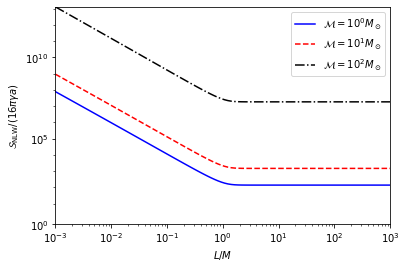

In [14]:
l_space = np.logspace(-3, 3, 100) # range = (1e-2, 1e4)
fig, ax = plt.subplots()
ax.plot(l_space, Snl_AdS(1e0, l_space, 1e15), \
        'b-', label = r'${\cal M} = 10^0 M_\odot$')
ax.plot(l_space, Snl_AdS(1e1, l_space, 1e15), \
        'r--', label = r'${\cal M} = 10^1 M_\odot$')
ax.plot(l_space, Snl_AdS(1e5, l_space, 1e15), \
        'k-.', label = r'${\cal M} = 10^2 M_\odot$')

ax.set_xscale('log')
ax.set_yscale('symlog')
ax.set_xlim(min(l_space), max(l_space))
ax.set_ylim(1e0)
ax.set_yticks([1e0, 1e5, 1e10])
ax.set_xlabel('$L/M$')
ax.set_ylabel(r'${\cal S}_{\rm NLW}/(16\pi\gamma a)$')
ax.legend(loc = 'upper right')
# fig.savefig('figs/entropyvsl.pdf', bbox_inches = 'tight')
plt.show()

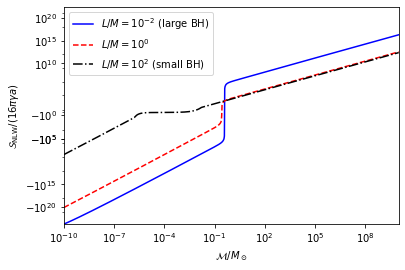

In [15]:
m_space = np.logspace(-10, 10, 1000) # range = (1e-2, 1e4)
fig, ax = plt.subplots()
ax.plot(m_space, Snl_AdS(m_space, 1e-2, 1e15), 'b-', \
        label = r'$L/M = 10^{-2}$ (large BH)')
ax.plot(m_space, Snl_AdS(m_space, 1e0, 1e15), 'r--', \
        label = r'$L/M = 10^0$')
ax.plot(m_space, Snl_AdS(m_space, 1e2, 1e15), 'k-.', \
        label = r'$L/M = 10^2$ (small BH)')

ax.set_xscale('log')
ax.set_yscale('symlog')
ax.set_xlim(min(m_space), max(m_space))
ax.set_yticks([-1e20, -1e15, -1e5, -1e0, -1e5, 1e10, 1e15, 1e20])
ax.set_xlabel(r'${\cal M}/M_\odot$')
ax.set_ylabel(r'${\cal S}_{\rm NLW}/(16\pi\gamma a)$')
ax.legend(loc = 'upper left')
# fig.savefig('figs/entropyvsm.pdf', bbox_inches = 'tight')
plt.show()